<a href="https://colab.research.google.com/github/SeruiosBoss/AI3_1/blob/main/10/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_10_%D0%98%D0%BB%D1%8C%D0%BD%D1%83%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 10. Визуализация данных

ФИО: **Мухамеджанов Ильнур Тимурович**

Группа: **ПИН-б-о-22-1**

## Задание, Вариант 16

Проведите `первичный анализ данных`. Особое внимание следует уделить
`графическому представлению` распределений признаков, `визуализации
взаимосвязей`, позволяющие судить о наборе данных. `Построение графиков`
желательно произвести по `нескольким проекциям`. При анализе данных
использовать как можно `более разнообразные типы графиков`

## Обозначение функций, `Первичный анализ данных`, Построение как можно более `разнообразных типов` графиков

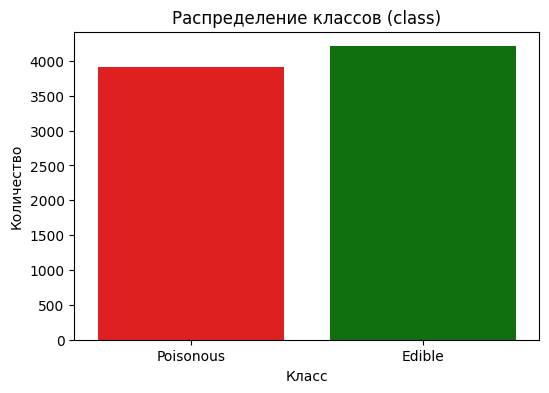

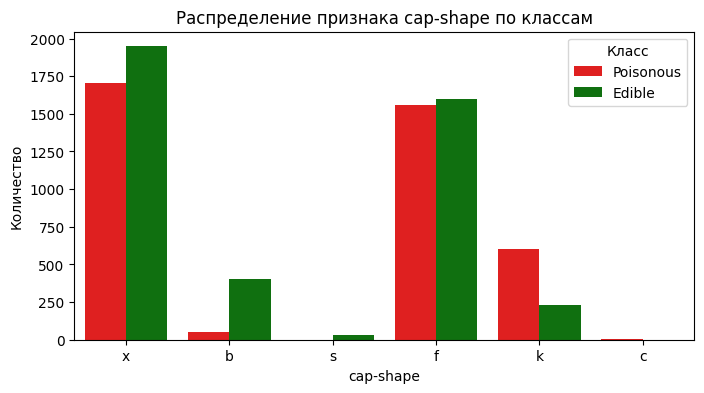

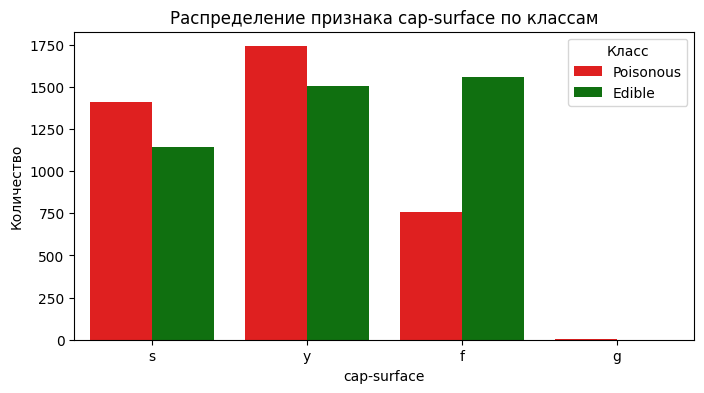

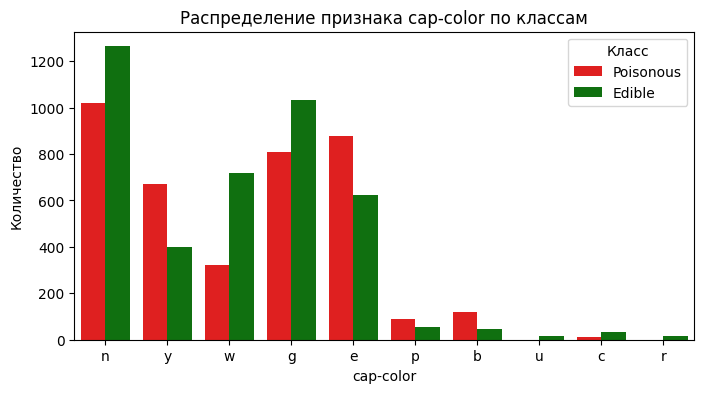

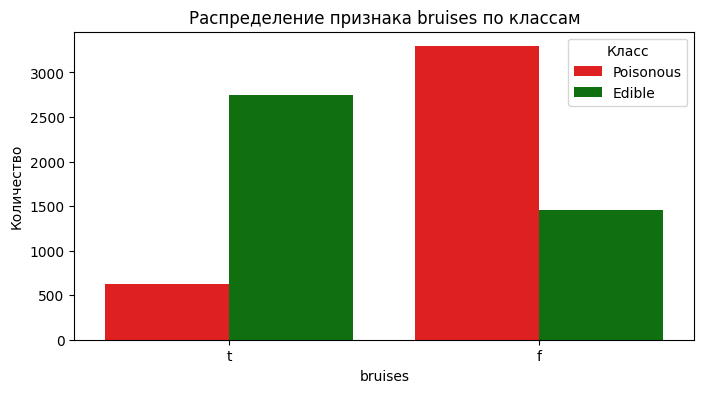

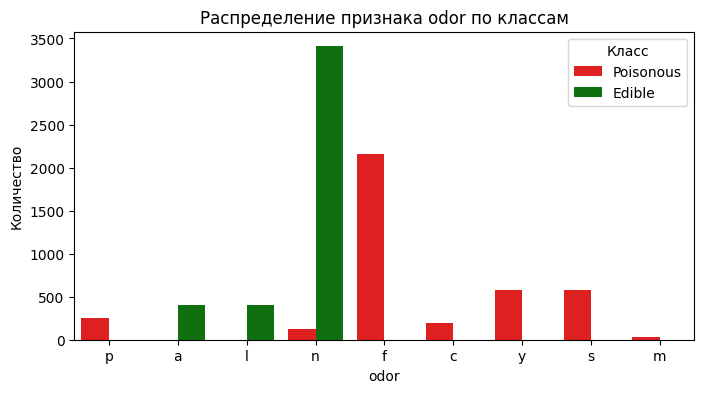

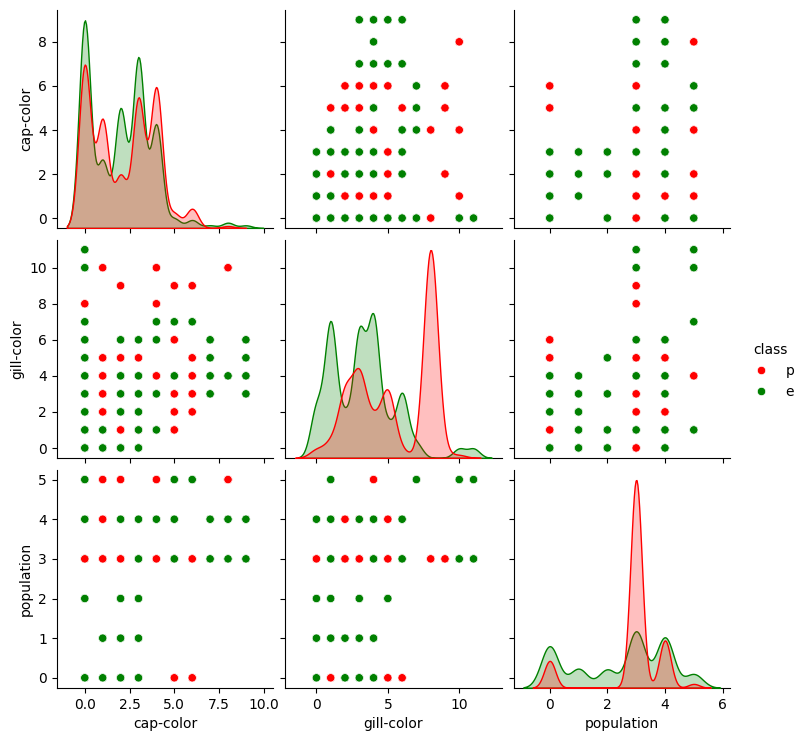

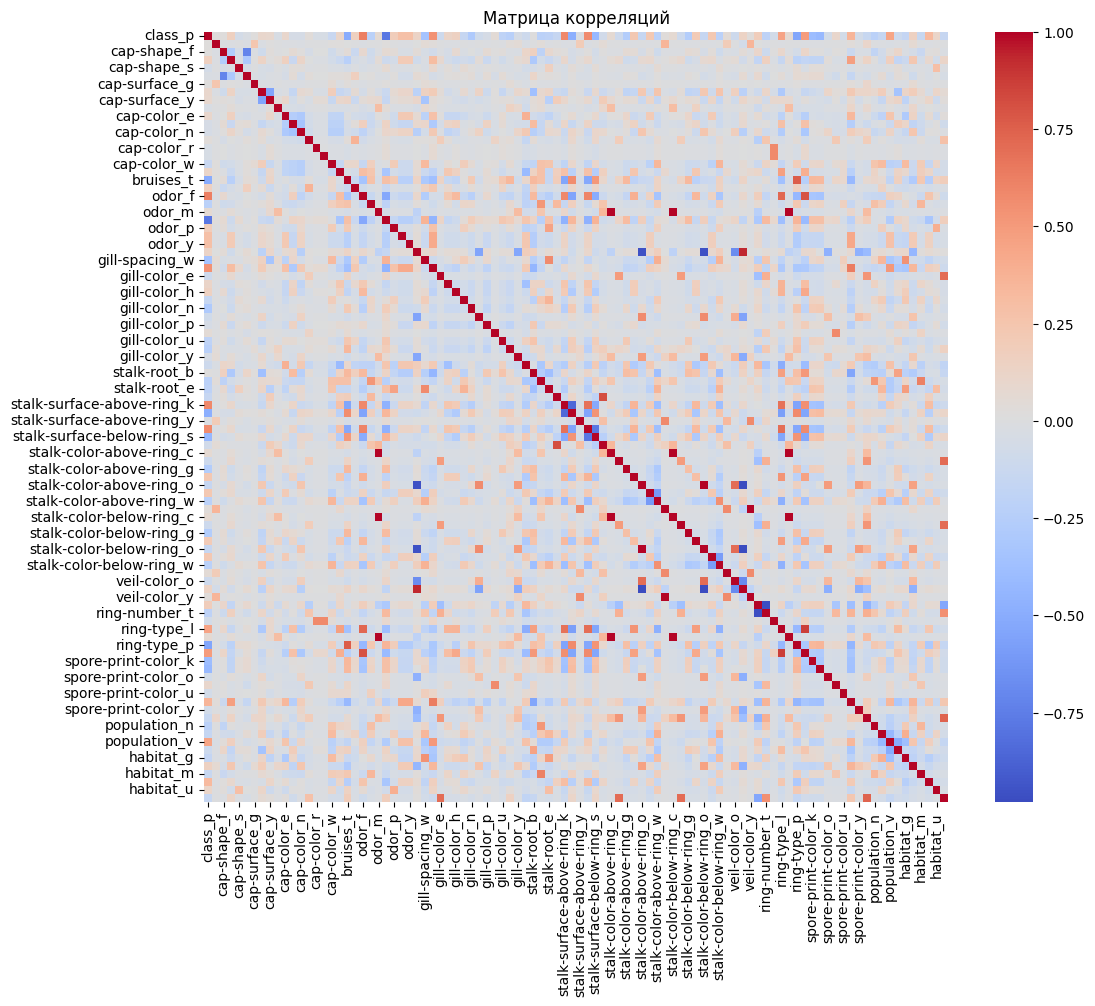

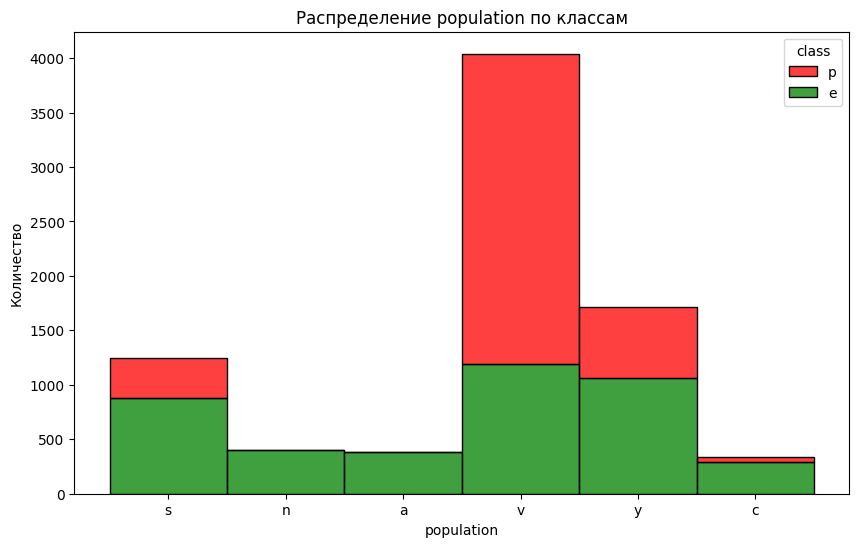

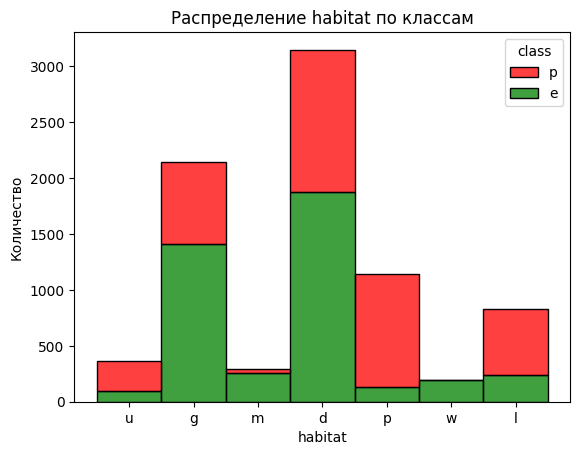

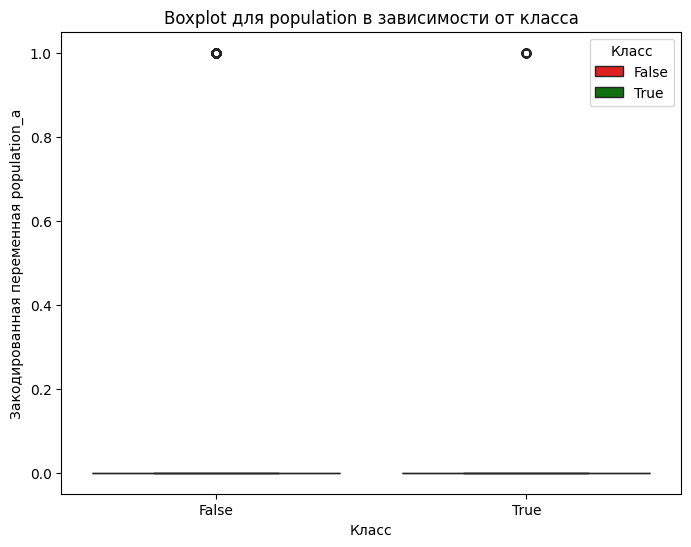

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
attributes = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment",
    "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root",
    "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type",
    "spore-print-color", "population", "habitat"
]

data = pd.read_csv("agaricus-lepiota.data", header=None, names=attributes)

# 1. Анализ распределения классов
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='class', hue='class', dodge=False, palette=['red', 'green'])
plt.title('Распределение классов (class)')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(ticks=[0, 1], labels=['Poisonous', 'Edible'])
plt.show()

# 2. Распределение категориальных признаков
categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature, hue='class', palette=['red', 'green'])
    plt.title(f'Распределение признака {feature} по классам')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.legend(title='Класс', labels=['Poisonous', 'Edible'])
    plt.show()

# 3. Анализ взаимосвязей между признаками
# Выбор пары признаков для визуализации
data_encoded = data.copy()
for col in ['cap-color', 'gill-color', 'population']:
    data_encoded[col] = pd.factorize(data_encoded[col])[0]

sns.pairplot(data_encoded, vars=['cap-color', 'gill-color', 'population'], hue='class', palette=['red', 'green'])
plt.show()

# 4. Матрица корреляции (после кодирования категориальных данных)
def encode_categorical(df):
    return pd.get_dummies(df, drop_first=True)

encoded_data = encode_categorical(data)
#print(encoded_data.columns)

# Расчет корреляции
correlation_matrix = encoded_data.corr()

# Тепловая карта корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Матрица корреляций')
plt.show()

# 5. Распределение признаков в зависимости от классов (гистограммы)
plt.figure(figsize=(10, 6))
for feature in ['population', 'habitat']:
    sns.histplot(data=data, x=feature, hue='class', multiple='stack', palette=['red', 'green'])
    plt.title(f'Распределение {feature} по классам')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.show()

# 6. Boxplot для анализа признаков
plt.figure(figsize=(8, 6))
sns.boxplot(data=encoded_data, x='class_p', y='population_c', hue='class_p', palette=['red', 'green'])
plt.title('Boxplot для population в зависимости от класса')
plt.xlabel('Класс')
plt.ylabel('Закодированная переменная population_a')
plt.legend(title='Класс')
plt.show()


В данной работе были использованы библиотеки `numpy, matplotlib, seaborn` и модуль `pyplot` для первичного анализа данных и построения `разнообразных` графических представлений и их `стилизации`

### 1. **Какие инструментальные средства используются для организации рабочего места специалиста Data Science?**  
- **Рабочее оборудование:**  
  - Мощный компьютер с достаточным объемом оперативной памяти (не менее 16 ГБ) и производительным процессором.  
  - Графический процессор (GPU) для ускорения вычислений при обучении сложных моделей.  

- **Программное обеспечение:**  
  - **Операционная система:** Linux (Ubuntu) или macOS (из-за удобства работы с инструментами разработки), Windows также используется.  
  - **Среды разработки:** Jupyter Notebook, PyCharm, VS Code.  
  - **Пакеты и менеджеры зависимостей:** Anaconda, pip, Poetry.  

- **Средства работы с данными:**  
  - **Базы данных:** PostgreSQL, MySQL, MongoDB.  
  - **Инструменты для ETL:** Apache Airflow, Luigi, pandas для локальных задач.  

- **Облачные платформы:**  
  - Google Colab, Amazon SageMaker, Microsoft Azure ML, Google Cloud AI.  

- **Системы контроля версий:**  
  - Git, платформы для совместной работы: GitHub, GitLab.  

- **Визуализация:**  
  - Инструменты: Matplotlib, Seaborn, Tableau, Power BI.  

---

### 2. **Какие библиотеки Python используются для работы в области машинного обучения? Дайте краткую характеристику каждой библиотеке.**  

1. **Scikit-learn**  
   - Набор инструментов для классических алгоритмов машинного обучения.  
   - Поддерживает классификацию, регрессию, кластеризацию, обработку данных.  

2. **TensorFlow**  
   - Платформа для создания и обучения нейронных сетей, разработанная Google.  
   - Подходит для задач глубокого обучения, поддерживает работу на GPU/TPU.  

3. **PyTorch**  
   - Разработан Facebook, активно используется в исследованиях.  
   - Удобен для создания сложных архитектур, поддерживает динамическую графовую модель.  

4. **Keras**  
   - Высокоуровневый интерфейс для TensorFlow.  
   - Прост в использовании, используется для быстрого прототипирования нейронных сетей.  

5. **XGBoost**  
   - Библиотека градиентного бустинга на деревьях решений.  
   - Эффективна в соревнованиях по анализу данных (Kaggle).  

6. **LightGBM**  
   - Быстрая и эффективная библиотека бустинга от Microsoft.  
   - Лучше работает на больших наборах данных и поддерживает категориальные переменные.  

7. **pandas**  
   - Инструмент для работы с табличными данными.  
   - Удобен для анализа, манипуляций и подготовки данных.  

8. **NumPy**  
   - Основа для работы с массивами и матрицами.  
   - Оптимизирован для выполнения математических операций.  

9. **Matplotlib и Seaborn**  
   - Визуализация данных.  
   - Matplotlib — для создания графиков, Seaborn — для улучшения их эстетики.  

10. **NLTK и SpaCy**  
    - Библиотеки для обработки естественного языка (NLP).  
    - NLTK используется для исследований, SpaCy — для продуктивного использования.  

---

### 3. **Почему при реализации систем машинного обучения широкое распространение получили библиотеки Python?**  

1. **Простота языка:**  
   - Python понятен как новичкам, так и опытным специалистам.  
   - Читаемый код ускоряет разработку и исследования.  

2. **Обширная экосистема:**  
   - Множество библиотек для машинного обучения, работы с данными, визуализации.  
   - Интеграция с другими языками и инструментами (C, R, SQL).  

3. **Большое сообщество:**  
   - Активное развитие библиотек, большое количество обучающих материалов.  
   - Возможность быстро найти решение благодаря открытым репозиториям.  

4. **Кроссплатформенность:**  
   - Работает на Windows, macOS и Linux.  
   - Удобен как для исследований, так и для промышленного использования.  

5. **Поддержка со стороны компаний:**  
   - Такие компании, как Google (TensorFlow) и Facebook (PyTorch), активно развивают экосистему Python.  

6. **Гибкость:**  
   - Можно интегрировать в рабочие процессы с использованием других языков (например, C++).  
   - Используется как для прототипирования, так и для создания конечных продуктов.  

---

### 4. **Перечислите функции Python, которые были изучены в рамках данной лабораторной работы и которые используются для визуализации данных.**  
- **`plot()`** — для создания линейных графиков.  
- **`scatter()`** — для построения диаграмм разброса.  
- **`bar()`** — для создания столбчатых диаграмм.  
- **`hist()`** — для построения гистограмм.  
- **`pie()`** — для круговых диаграмм.  
- **`imshow()`** — для визуализации матриц или изображений.  
- **`xlabel()`, `ylabel()`, `title()`** — для добавления подписей к осям и заголовков.  
- **`legend()`** — для отображения легенды на графике.  
- **`show()`** — для вывода графика.  

---

### 5. **Какая библиотека Python предназначена для управления наборами данных: numpy, pandas, sklearn, opencv, matplotlib?**  
- **Ответ:** pandas.  
  - Pandas предоставляет удобные структуры данных (Series и DataFrame) и функции для манипулирования, анализа и обработки данных.

---

### 6. **Какая стратегия является нежелательной при обработке пропусков в данных?**  
**Ответ:**  
б) **удаление строк, содержащих пропуски в данных.**  

**Обоснование:**  
Удаление строк с пропусками может привести к потере значимой информации, особенно если таких строк много. Это может негативно сказаться на качестве модели.

---

### 7. **Нужно ли применять к данному целевому признаку OneHotEncoder?**  
**Ответ:**  
**Не нужно.**  

**Обоснование:**  
OneHotEncoder применяется к независимым категориальным признакам, но не к целевому (зависимому). Для целевого признака достаточно использовать кодирование целых чисел (LabelEncoder) или работать с категориальным форматом, в зависимости от задачи (например, классификация).  

---

### 8. **Поясните принцип разбиения набора данных на обучающую и тестовую выборку. Какое соотношение «тестовая:обучающая» наиболее оптимально: 20:80, 50:50, 25:75, 5:95, 40:30?**  
- **Принцип разбиения:**  
  Данные разделяются на две части:  
  - **Обучающая выборка** используется для подбора параметров модели.  
  - **Тестовая выборка** используется для оценки качества модели на данных, которые она не видела ранее.  

- **Наиболее оптимальное соотношение:**  
  **20:80 или 25:75.**  

**Обоснование:**  
Это позволяет иметь достаточно данных для обучения модели и оставляет достаточно данных для тестирования, чтобы результаты были статистически значимыми.

---

### 9. **Какой код лучше использовать при загрузке данных из csv-файла?**  
**Ответ:**  
а) **`dataset = read_csv(“data.csv”)`**  

**Обоснование:**  
Функция `read_csv` принадлежит библиотеке pandas и широко используется для чтения CSV-файлов в DataFrame. Другие варианты являются некорректными или не относятся к Python.